In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False


from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

'MedInc': 收入中位数  
'HouseAge'：房龄  
'AveRooms'：平均房间数  
'AveBedrms'：平均卧室数  
'Population'：入住人口    
'AveOccup'：入住率  
'Latitude'：纬度  
'Longitude'：经度  

In [7]:
cal_data = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]

In [9]:
data.target_names

['MedHouseVal']

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(cal_data)
X_ = std.transform(cal_data)
X_

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253],
       ...,
       [-1.14259331, -0.92485123, -0.09031802,  0.04941393, -0.3695372 ,
        -0.0717345 ],
       [-1.05458292, -0.84539315, -0.04021111,  0.15877763, -0.60442933,
        -0.09122515],
       [-0.78012947, -1.00430931, -0.07044252,  0.1384028 , -0.03397701,
        -0.04368215]])

In [31]:
ss = []

for i in range(3,10):
    K = KMeans(n_clusters=i).fit(X_)
    ss.append(silhouette_score(X_, K.labels_))
ss

[0.276726405415391,
 0.27847790141790724,
 0.2781679143056035,
 0.27850748174388557,
 0.2804709869852149,
 0.23708963692160565,
 0.2398995436620486]

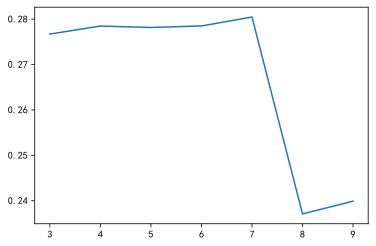

In [32]:
plt.plot(range(3,10), ss)
plt.show()

In [38]:
K = KMeans(n_clusters=6).fit(X_)
K.predict(X_)

array([1, 1, 1, ..., 2, 2, 2])

In [39]:
K.predict(np.array([ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654]).reshape(1,-1))

array([1])

In [40]:
K.predict(np.array([-0.78012947, -1.00430931, -0.07044252,  0.1384028 , -0.03397701,
        -0.04368215]).reshape(1,-1))

array([2])